In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from pandas_profiling import ProfileReport


In [2]:
infos = pd.read_csv('../data/infos.csv', sep='|', 
                    converters = {'itemID': str})
items = pd.read_csv('../data/items.csv', sep='|', 
                    converters = {'itemID': str, 'brand': str, 'manufacturer': str, 
                                  'category1': str, 'category2': str, 'category3': str})
orders = pd.read_csv('../data/orders.csv', sep='|', 
                     converters = {'time': np.datetime64, 'transactID': str, 'itemID': str})

In [3]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181955 entries, 0 to 2181954
Data columns (total 5 columns):
 #   Column      Dtype         
---  ------      -----         
 0   time        datetime64[ns]
 1   transactID  object        
 2   itemID      object        
 3   order       int64         
 4   salesPrice  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 83.2+ MB


In [4]:
orders.describe()

,order,salesPrice
count,2.181955e+06,2.181955e+06
mean,1.244553e+00,3.668124e+01
std,6.665127e-01,1.261080e+02
min,1.000000e+00,0.000000e+00
25%,1.000000e+00,7.120000e+00
50%,1.000000e+00,1.668000e+01
75%,1.000000e+00,3.462000e+01
max,1.000000e+02,9.387020e+03


In [5]:
print('Order starting {} and ending {}'.format(orders['time'].min(), orders['time'].max()))

Order starting 2018-01-01 00:01:56 and ending 2018-06-29 23:57:01


In [6]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10463 entries, 0 to 10462
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   itemID                  10463 non-null  object 
 1   brand                   10463 non-null  object 
 2   manufacturer            10463 non-null  object 
 3   customerRating          10463 non-null  float64
 4   category1               10463 non-null  object 
 5   category2               10463 non-null  object 
 6   category3               10463 non-null  object 
 7   recommendedRetailPrice  10463 non-null  float64
dtypes: float64(2), object(6)
memory usage: 654.1+ KB


In [7]:
items.describe()

,customerRating,recommendedRetailPrice
count,10463.000000,10463.000000
mean,1.408953,118.283142
std,2.135633,339.338973
min,0.000000,2.460000
25%,0.000000,13.950000
50%,0.000000,24.220000
75%,4.000000,67.920000
max,5.000000,6955.000000


In [8]:
infos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10463 entries, 0 to 10462
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   itemID           10463 non-null  object 
 1   simulationPrice  10463 non-null  float64
 2   promotion        1843 non-null   object 
dtypes: float64(1), object(2)
memory usage: 245.4+ KB


In [9]:
infos.describe()

,simulationPrice
count,10463.000000
mean,122.010808
std,469.701306
min,0.380000
25%,8.990000
50%,23.830000
75%,63.125000
max,9055.070000


In [10]:
infos['promotion'].unique()

array([nan, '2018-07-13', '2018-07-01,2018-07-02,2018-07-13',
       '2018-07-05,2018-07-11', '2018-07-05', '2018-07-01', '2018-07-04',
       '2018-07-08', '2018-07-08,2018-07-13', '2018-07-09', '2018-06-30',
       '2018-07-11', '2018-07-06', '2018-07-08,2018-07-11',
       '2018-06-30,2018-07-13', '2018-06-30,2018-07-01,2018-07-11',
       '2018-07-06,2018-07-13', '2018-07-06,2018-07-10', '2018-07-10',
       '2018-07-08,2018-07-10', '2018-06-30,2018-07-04',
       '2018-07-01,2018-07-10', '2018-07-02', '2018-06-30,2018-07-01',
       '2018-07-04,2018-07-05,2018-07-06', '2018-07-04,2018-07-05',
       '2018-07-01,2018-07-06', '2018-06-30,2018-07-06',
       '2018-07-05,2018-07-13', '2018-07-01,2018-07-02', '2018-07-03',
       '2018-07-03,2018-07-04,2018-07-05',
       '2018-07-03,2018-07-04,2018-07-06', '2018-07-03,2018-07-04',
       '2018-07-03,2018-07-05', '2018-07-04,2018-07-09',
       '2018-07-04,2018-07-06', '2018-07-02,2018-07-04', '2018-07-12',
       '2018-07-02,2018-07-0

the infos.csv contains only relevant information for the two week predicion period 

In [11]:
items

,itemID,brand,manufacturer,customerRating,category1,category2,category3,recommendedRetailPrice
0,1,0,1,4.38,1,1,1,8.84
1,2,0,2,3.00,1,2,1,16.92
2,3,0,3,5.00,1,3,1,15.89
3,4,0,2,4.44,1,2,1,40.17
4,5,0,2,2.33,1,1,1,17.04
...,...,...,...,...,...,...,...,...
10458,10459,180,253,0.00,8,44,8,56.57
10459,10460,0,253,0.00,8,44,8,163.81
10460,10461,0,253,0.00,8,44,8,128.01
10461,10462,180,253,0.00,8,44,8,166.97


In [12]:
# profile = ProfileReport(items, title='Items Profiling Report', explorative=True)
# profile.to_notebook_iframe()

In [13]:
from sklearn.metrics import mutual_info_score, normalized_mutual_info_score
from scipy.stats import pearsonr, pointbiserialr


In [14]:
item_corr = pd.DataFrame(index=items.columns[1:], columns=items.columns[1:])
for col in item_corr.columns: 
    for row in item_corr.columns:
        if items[col].dtype == 'object': 
            if items[row].dtype == 'object': 
                item_corr.loc[row, col] = normalized_mutual_info_score(items[row], items[col])
#             else: 
#                 print(row, col)
#                 pointbiserialr(items[row].values, items[col].values)[0]
        else: 
            if items[row].dtype != 'object': 
                item_corr.loc[row, col] = pearsonr(items[row].values, items[col].values)[0]
#             else: 
#                 print(row, col)
#                 pointbiserialr(items[row].values, items[col].values)[0]
        
item_corr

,brand,manufacturer,customerRating,category1,category2,category3,recommendedRetailPrice
brand,1,0.653802,NaN,0.406557,0.493926,0.406137,NaN
manufacturer,0.653802,1,NaN,0.521556,0.643414,0.523544,NaN
customerRating,NaN,NaN,1,NaN,NaN,NaN,-0.0434403
category1,0.406557,0.521556,NaN,1,0.759947,0.955646,NaN
category2,0.493926,0.643414,NaN,0.759947,1,0.746469,NaN
category3,0.406137,0.523544,NaN,0.955646,0.746469,1,NaN
recommendedRetailPrice,NaN,NaN,-0.0434403,NaN,NaN,NaN,1


High Correlation between category1 and category3 

In [15]:
orders['totalSalesPrice'] = orders['order']*orders['salesPrice']

In [16]:
print('Most common items in transactions')
orders['itemID'].value_counts().sort_values(ascending=False)[:10]

Most common items in transactions


5035    8973
5117    8063
7789    7415
5122    6442
5139    5407
4208    5088
8371    4999
4322    4955
7792    4631
5039    4433
Name: itemID, dtype: int64

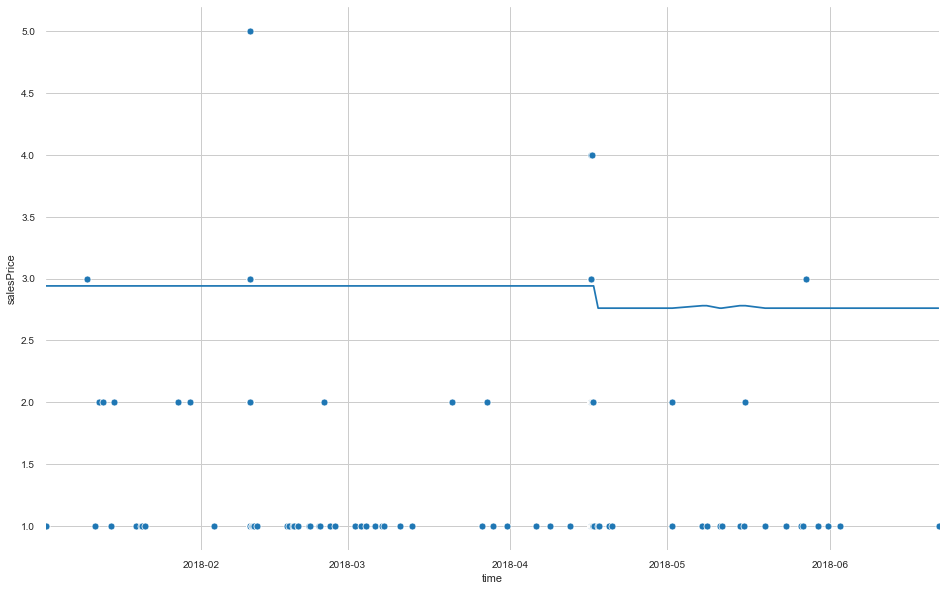

In [17]:
plt.figure(figsize=(16,10))
sns.scatterplot(x = 'time', y='order', data=orders[orders['itemID']=='8063'])
sns.lineplot(x = 'time', y='salesPrice', data=orders[orders['itemID']=='8063'])
plt.xlim(left=orders[orders['itemID']=='8063']['time'].min(), right=orders[orders['itemID']=='8063']['time'].max())
plt.grid()

In [18]:
orders[orders['itemID']=='8063']

,time,transactID,itemID,order,salesPrice,totalSalesPrice
5585,2018-01-02 10:05:07,2271188,8063,1,2.94,2.94
5677,2018-01-02 10:20:34,2270802,8063,1,2.94,2.94
54147,2018-01-10 06:20:17,2289088,8063,3,2.94,8.82
61183,2018-01-11 18:49:42,2279065,8063,1,2.94,2.94
63521,2018-01-12 14:50:55,2286767,8063,2,2.94,5.88
...,...,...,...,...,...,...
1647784,2018-05-27 11:55:14,2291494,8063,3,2.76,8.28
1679355,2018-05-29 16:42:48,2255962,8063,1,2.76,2.76
1712338,2018-05-31 17:39:46,2282044,8063,1,2.76,2.76
1743034,2018-06-02 22:36:33,1635077,8063,1,2.76,2.76


In [19]:
df_ = orders.copy()

In [20]:
df_['date'] = df_['time'].dt.date

In [21]:
sales_values = df_.groupby('date').apply(lambda x: x['totalSalesPrice'].sum())

In [22]:
sales = pd.DataFrame({'time': pd.to_datetime(sales_values.index.values), 'sales': sales_values.values})

In [23]:
sales['weekDay'] = sales['time'].dt.weekday

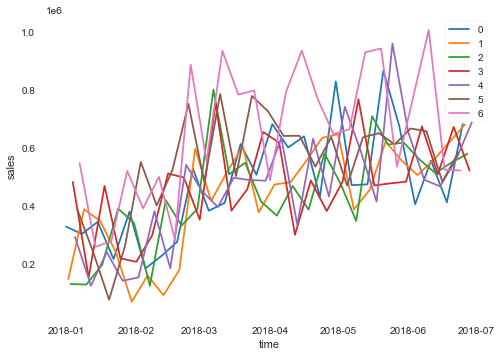

In [24]:
for weekDay in sales['weekDay'].unique():
    sns.lineplot(x='time', y='sales', data=sales[sales['weekDay'] == weekDay], label=weekDay)
# sns.scatterplot(x='time', y='salesPerDay', data=sales, label='total', )

In [233]:
sales.sort_values(by='sales', ascending=False)[:10]

,time,sales,weekDay,week
160,2018-06-10,1006111.65,6,23
144,2018-05-25,958470.25,4,21
139,2018-05-20,941721.20,6,20
104,2018-04-15,934762.07,6,15
69,2018-03-11,933697.25,6,10
132,2018-05-13,928766.68,6,19
55,2018-02-25,885710.77,6,8
140,2018-05-21,866495.54,0,21
119,2018-04-30,827852.44,0,18
65,2018-03-07,799776.48,2,10


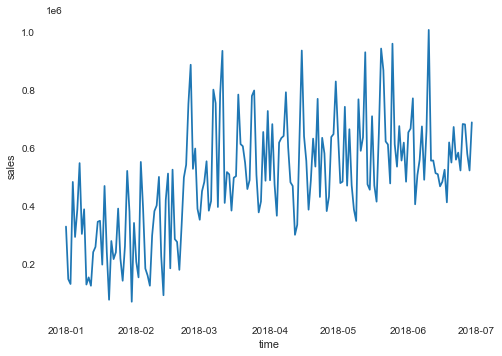

In [231]:
sns.lineplot(x='time', y='sales', data=sales)
sales

In [266]:
sales.groupby('weekDay').sum()['sales']

weekDay
0    12381378.58
1    11265035.60
2    11447365.03
3    12240286.78
4    11928096.00
5    13645656.07
6    16230467.16
Name: sales, dtype: float64

In [25]:
sales['week'] = sales['time'].dt.week

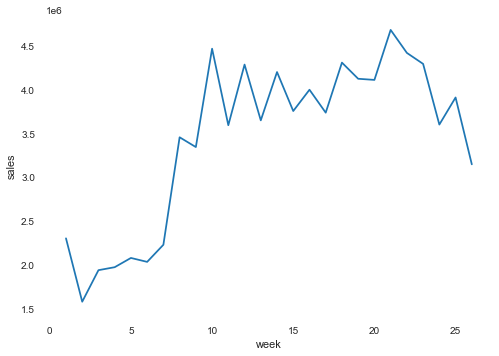

In [26]:
sns.lineplot(x=sales.groupby('week').sum().index, y=sales.groupby('week').sum()['sales'])


## Orders per Day

In [27]:
orders_per_day = orders.copy()

In [28]:
orders_per_day['time'] = orders_per_day['time'].dt.date

In [29]:
orders_per_day.drop(['salesPrice', 'transactID'], axis=1, inplace=True)

In [30]:
orders_per_day.groupby(['time', 'itemID']).sum()

order  totalSalesPrice
time       itemID                        
2018-01-01 109         2            11.60
           11          1             2.13
           113        81           277.02
           128         1            42.38
           137         1            42.26
...                  ...              ...
2018-06-29 9889       36           744.84
           9907        1            80.00
           9908        1           631.81
           9922        1            13.37
           9997       10           309.70

[100148 rows x 2 columns]

In [31]:
orders_per_day = orders_per_day.groupby(['time', 'itemID']).sum().reset_index()

In [32]:
orders_per_day['salesPrice'] = orders_per_day['totalSalesPrice'] / orders_per_day['order']

In [33]:
orders_per_day

,time,itemID,order,totalSalesPrice,salesPrice
0,2018-01-01,109,2,11.60,5.80
1,2018-01-01,11,1,2.13,2.13
2,2018-01-01,113,81,277.02,3.42
3,2018-01-01,128,1,42.38,42.38
4,2018-01-01,137,1,42.26,42.26
...,...,...,...,...,...
100143,2018-06-29,9889,36,744.84,20.69
100144,2018-06-29,9907,1,80.00,80.00
100145,2018-06-29,9908,1,631.81,631.81
100146,2018-06-29,9922,1,13.37,13.37


In [34]:
orders_per_day.groupby('itemID').count()['time'].sort_values(ascending=False)[:10]

itemID
7798    180
5122    151
7789    137
5035    122
7792    121
8085    108
4208    104
7938    102
4896    101
5117     99
Name: time, dtype: int64

C:\Users\Luis\Miniconda3\envs\aiss_py37\lib\site-packages\seaborn\relational.py:784: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
C:\Users\Luis\Miniconda3\envs\aiss_py37\lib\site-packages\seaborn\relational.py:795: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


(736695.0, 736874.0)

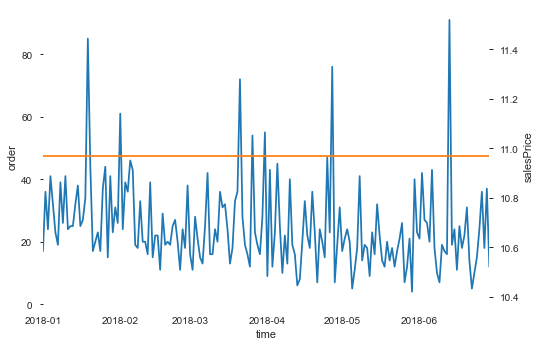

In [35]:
item = '7798'
fig, ax = plt.subplots()
sns.lineplot(x=orders_per_day.loc[orders_per_day['itemID']==item]['time'], y=orders_per_day.loc[orders_per_day['itemID']==item]['order'], ax=ax)
ax2 = ax.twinx()
sns.lineplot(x=orders_per_day.loc[orders_per_day['itemID']==item]['time'], y=orders_per_day.loc[orders_per_day['itemID']==item]['salesPrice'], c=sns.color_palette()[1], ax=ax2)
plt.xlim(left=orders_per_day[orders_per_day['itemID']==item]['time'].min(), right=orders_per_day[orders_per_day['itemID']==item]['time'].max())


C:\Users\Luis\Miniconda3\envs\aiss_py37\lib\site-packages\seaborn\relational.py:784: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
C:\Users\Luis\Miniconda3\envs\aiss_py37\lib\site-packages\seaborn\relational.py:795: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


(736700.0, 736874.0)

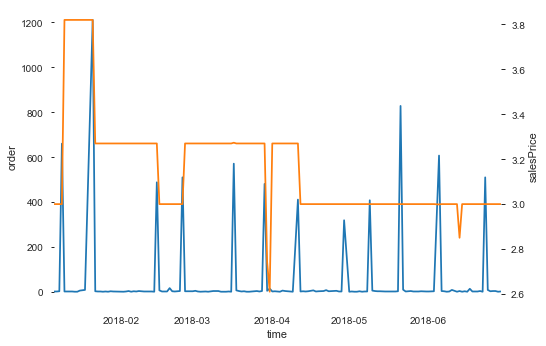

In [739]:
item = '5122'
fig, ax = plt.subplots()
sns.lineplot(x=orders_per_day.loc[orders_per_day['itemID']==item]['time'], y=orders_per_day.loc[orders_per_day['itemID']==item]['order'], ax=ax)
ax2 = ax.twinx()
sns.lineplot(x=orders_per_day.loc[orders_per_day['itemID']==item]['time'], y=orders_per_day.loc[orders_per_day['itemID']==item]['salesPrice'], c=sns.color_palette()[1], ax=ax2)
plt.xlim(left=orders_per_day[orders_per_day['itemID']==item]['time'].min(), right=orders_per_day[orders_per_day['itemID']==item]['time'].max())


In [741]:
orders_per_day.loc[(orders_per_day['itemID']==item)&(orders_per_day['order']>200)]

,time,itemID,order,totalSalesPrice,salesPrice,pred_promotion
2221,2018-01-09,5122,660,1980.00,3.000000,True
5720,2018-01-21,5122,1211,4626.02,3.820000,True
12981,2018-02-15,5122,488,1595.76,3.270000,True
16282,2018-02-25,5122,510,1530.00,3.000000,True
25803,2018-03-17,5122,571,1869.06,3.273310,True
32272,2018-03-29,5122,481,1572.87,3.270000,True
40110,2018-04-11,5122,411,1343.97,3.270000,True
51540,2018-04-29,5122,319,957.00,3.000000,True
58652,2018-05-09,5122,408,1224.00,3.000000,True
67720,2018-05-21,5122,828,2484.00,3.000000,True


C:\Users\Luis\Miniconda3\envs\aiss_py37\lib\site-packages\seaborn\relational.py:784: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
C:\Users\Luis\Miniconda3\envs\aiss_py37\lib\site-packages\seaborn\relational.py:795: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


(736696.0, 736874.0)

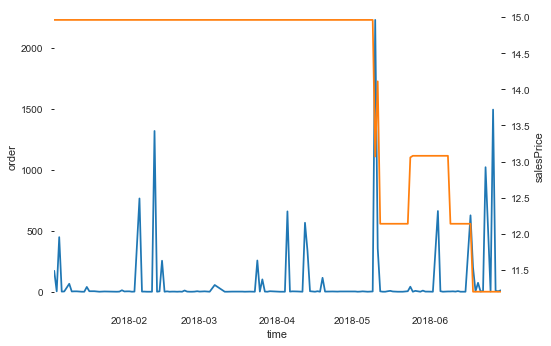

In [37]:
item = '7789'
fig, ax = plt.subplots()
sns.lineplot(x=orders_per_day.loc[orders_per_day['itemID']==item]['time'], y=orders_per_day.loc[orders_per_day['itemID']==item]['order'], ax=ax)
ax2 = ax.twinx()
sns.lineplot(x=orders_per_day.loc[orders_per_day['itemID']==item]['time'], y=orders_per_day.loc[orders_per_day['itemID']==item]['salesPrice'], c=sns.color_palette()[1], ax=ax2)
plt.xlim(left=orders_per_day[orders_per_day['itemID']==item]['time'].min(), right=orders_per_day[orders_per_day['itemID']==item]['time'].max())


In [38]:
orders_per_week = orders_per_day.copy()

In [39]:
orders_per_week

,time,itemID,order,totalSalesPrice,salesPrice
0,2018-01-01,109,2,11.60,5.80
1,2018-01-01,11,1,2.13,2.13
2,2018-01-01,113,81,277.02,3.42
3,2018-01-01,128,1,42.38,42.38
4,2018-01-01,137,1,42.26,42.26
...,...,...,...,...,...
100143,2018-06-29,9889,36,744.84,20.69
100144,2018-06-29,9907,1,80.00,80.00
100145,2018-06-29,9908,1,631.81,631.81
100146,2018-06-29,9922,1,13.37,13.37


In [40]:
orders_per_week['week'] = orders_per_week['time'].astype(np.datetime64).dt.week

In [41]:
orders_per_week = orders_per_week.drop(['salesPrice', 'time'], axis=1).groupby(['week', 'itemID']).sum().reset_index(drop=False)

In [42]:
orders_per_week

,week,itemID,order,totalSalesPrice
0,1,105,1,85.46
1,1,109,2,11.60
2,1,11,1,2.13
3,1,113,225,769.79
4,1,114,3,140.70
...,...,...,...,...
55132,26,9984,1,157.09
55133,26,999,1,52.61
55134,26,9990,1,59.81
55135,26,9997,10,309.70


In [43]:
orders_per_week['salesPrice'] = orders_per_week['totalSalesPrice'] / orders_per_week['order']

C:\Users\Luis\Miniconda3\envs\aiss_py37\lib\site-packages\seaborn\relational.py:784: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
C:\Users\Luis\Miniconda3\envs\aiss_py37\lib\site-packages\seaborn\relational.py:795: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


(1.0, 26.0)

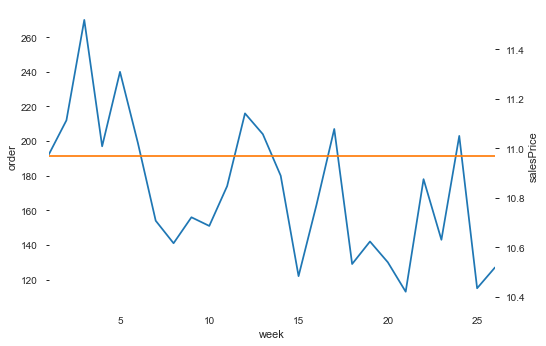

In [44]:
item = '7798'
fig, ax = plt.subplots()
sns.lineplot(x=orders_per_week.loc[orders_per_week['itemID']==item]['week'], y=orders_per_week.loc[orders_per_week['itemID']==item]['order'], ax=ax)
ax2 = ax.twinx()
sns.lineplot(x=orders_per_week.loc[orders_per_week['itemID']==item]['week'], y=orders_per_week.loc[orders_per_week['itemID']==item]['salesPrice'], c=sns.color_palette()[1], ax=ax2)
plt.xlim(left=orders_per_week[orders_per_week['itemID']==item]['week'].min(), right=orders_per_week[orders_per_week['itemID']==item]['week'].max())


C:\Users\Luis\Miniconda3\envs\aiss_py37\lib\site-packages\seaborn\relational.py:784: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
C:\Users\Luis\Miniconda3\envs\aiss_py37\lib\site-packages\seaborn\relational.py:795: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


(1.0, 26.0)

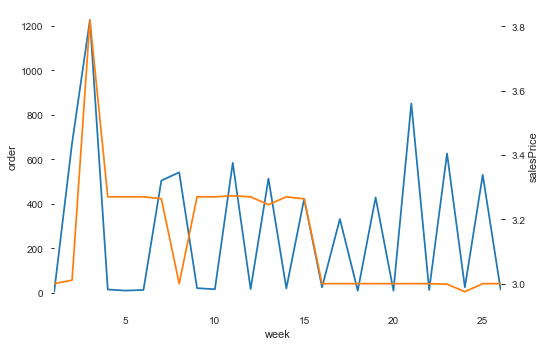

In [45]:
item = '5122'
fig, ax = plt.subplots()
sns.lineplot(x=orders_per_week.loc[orders_per_week['itemID']==item]['week'], y=orders_per_week.loc[orders_per_week['itemID']==item]['order'], ax=ax)
ax2 = ax.twinx()
sns.lineplot(x=orders_per_week.loc[orders_per_week['itemID']==item]['week'], y=orders_per_week.loc[orders_per_week['itemID']==item]['salesPrice'], c=sns.color_palette()[1], ax=ax2)
plt.xlim(left=orders_per_week[orders_per_week['itemID']==item]['week'].min(), right=orders_per_week[orders_per_week['itemID']==item]['week'].max())


In [46]:
top_10_items_per_week = orders_per_week.groupby('itemID').count()['week'].sort_values(ascending=False)[:10].index.values

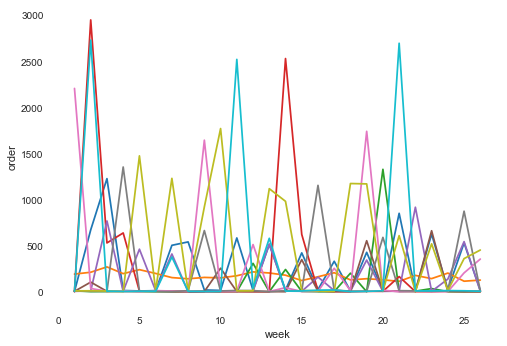

In [47]:
for item in top_10_items_per_week: 
#     fig, ax = plt.subplots()
    sns.lineplot(x=orders_per_week.loc[orders_per_week['itemID']==item]['week'], y=orders_per_week.loc[orders_per_week['itemID']==item]['order'])
#     ax2 = ax.twinx()
#     sns.lineplot(x=orders_per_week.loc[orders_per_week['itemID']==item]['week'], y=orders_per_week.loc[orders_per_week['itemID']==item]['salesPrice'], c=sns.color_palette()[1], ax=ax2)
#     plt.xlim(left=orders_per_week[orders_per_week['itemID']==item]['week'].min(), right=orders_per_week[orders_per_week['itemID']==item]['week'].max())


Looks like chaos to me... 

## Promotion of products

In [48]:
orders_per_day

,time,itemID,order,totalSalesPrice,salesPrice
0,2018-01-01,109,2,11.60,5.80
1,2018-01-01,11,1,2.13,2.13
2,2018-01-01,113,81,277.02,3.42
3,2018-01-01,128,1,42.38,42.38
4,2018-01-01,137,1,42.26,42.26
...,...,...,...,...,...
100143,2018-06-29,9889,36,744.84,20.69
100144,2018-06-29,9907,1,80.00,80.00
100145,2018-06-29,9908,1,631.81,631.81
100146,2018-06-29,9922,1,13.37,13.37


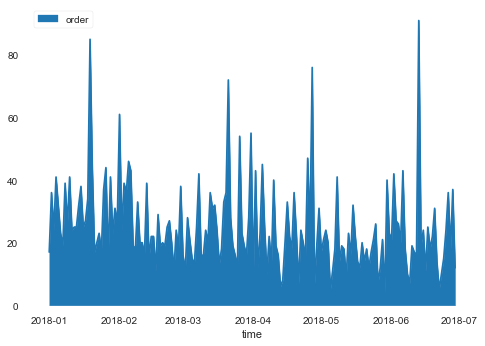

In [49]:
orders_per_day[orders_per_day['itemID']=='7798'].plot.area(x='time', y='order')

In [50]:
infos['promotion'].unique()

array([nan, '2018-07-13', '2018-07-01,2018-07-02,2018-07-13',
       '2018-07-05,2018-07-11', '2018-07-05', '2018-07-01', '2018-07-04',
       '2018-07-08', '2018-07-08,2018-07-13', '2018-07-09', '2018-06-30',
       '2018-07-11', '2018-07-06', '2018-07-08,2018-07-11',
       '2018-06-30,2018-07-13', '2018-06-30,2018-07-01,2018-07-11',
       '2018-07-06,2018-07-13', '2018-07-06,2018-07-10', '2018-07-10',
       '2018-07-08,2018-07-10', '2018-06-30,2018-07-04',
       '2018-07-01,2018-07-10', '2018-07-02', '2018-06-30,2018-07-01',
       '2018-07-04,2018-07-05,2018-07-06', '2018-07-04,2018-07-05',
       '2018-07-01,2018-07-06', '2018-06-30,2018-07-06',
       '2018-07-05,2018-07-13', '2018-07-01,2018-07-02', '2018-07-03',
       '2018-07-03,2018-07-04,2018-07-05',
       '2018-07-03,2018-07-04,2018-07-06', '2018-07-03,2018-07-04',
       '2018-07-03,2018-07-05', '2018-07-04,2018-07-09',
       '2018-07-04,2018-07-06', '2018-07-02,2018-07-04', '2018-07-12',
       '2018-07-02,2018-07-0

## Model training

In [52]:
df1 = orders_per_week.copy()

In [53]:
print(df1['week'].min(), df1['week'].max())

1 26


In [54]:
df1['itemID'].unique()

array(['105', '109', '11', ..., '9250', '9251', '9796'], dtype=object)

In [55]:
import itertools
weeks = []
item_ids = []
for r in itertools.product((list(range(1,26))), df1['itemID'].sort_values().unique()): 
    weeks.append(r[0])
    item_ids.append(r[1])

In [56]:
df2 = pd.DataFrame({'week': weeks, 'itemID': item_ids})

In [57]:
data = pd.merge(df2, df1, how='left', left_on = ['week', 'itemID'], right_on = ['week', 'itemID']) 

In [58]:
data['order'].fillna(0.0, inplace=True)

In [59]:
for item_id in data['itemID'].unique(): 
    data.loc[data['itemID'] == item_id, 'salesPrice'] = data.loc[data['itemID'] == item_id, 'salesPrice'].fillna(method='ffill').fillna(method='bfill')
    

KeyboardInterrupt: 

In [60]:
data['totalSalesPrice'] = data['order'] * data['salesPrice']

In [61]:
data

,week,itemID,order,totalSalesPrice,salesPrice
0,1,1,0.0,0.00,3.110000
1,1,10,0.0,0.00,25.690000
2,1,100,0.0,0.00,30.160000
3,1,1000,0.0,0.00,165.060000
4,1,10000,0.0,0.00,28.539602
...,...,...,...,...,...
245995,25,9995,3.0,577.89,192.630000
245996,25,9996,0.0,NaN,NaN
245997,25,9997,12.0,371.64,30.970000
245998,25,9998,1.0,53.88,53.880000


In [62]:
# data.to_csv('../data/weekly_order_data.csv', index=False)
data = pd.read_csv('../data/weekly_order_data.csv', converters={'itemID': str})
data.head()

,week,itemID,order,totalSalesPrice,salesPrice
0,1,1,0.0,0.0,3.110000
1,1,10,0.0,0.0,25.690000
2,1,100,0.0,0.0,30.160000
3,1,1000,0.0,0.0,165.060000
4,1,10000,0.0,0.0,28.539602


In [63]:
data['order'].describe()

count    246000.000000
mean         10.579276
std          73.947937
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        4812.000000
Name: order, dtype: float64

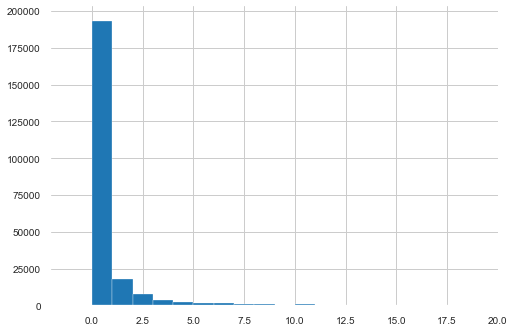

In [64]:
bins_list = list(range(-1, 20))
data['order'].hist(bins = bins_list)

A lot of the orders are actually 0... <br>
How does the data look when we filter those out? 

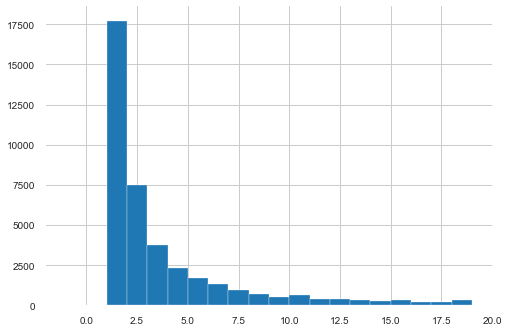

In [65]:
data[data['order']>0]['order'].hist(bins = bins_list)

## Evaluation Function

In [66]:
def scoring_function(pred, true, priceData, week_number = 24, verbose=0): 
    priceData = priceData[priceData['week']>week_number]
    score = 0
    for itemID in true['itemID'].unique(): 
        s = 0
        actual = true[true['itemID']==itemID]['demandPrediction'].iloc[0]
        predicted = pred[pred['itemID']==itemID]['demandPrediction'].iloc[0]
        price = priceData[priceData['itemID']==itemID]['salesPrice'].iloc[0]
        if actual >= predicted: 
            s += price * predicted
        else: 
            s += price * actual
            s -= 0.6 * price * (predicted - actual)
        if verbose > 0: 
            print('Score for item with ID {}:\t {:.2f} (max: {})'.format(itemID, s, price*actual))
        score += s
    return score

In [67]:
# Testing the scoring Function

pred = pd.DataFrame({'itemID': ['1', '9997', '9998'], 'demandPrediction': [2, 5, 10]})
# pred = pd.DataFrame({'itemID': ['9995', '9997', '9998'], 'demandPrediction': [15, 5, 2]})


true = pd.DataFrame({'itemID': ['1', '9997', '9998'], 'demandPrediction': [15, 5, 2]})

scoring_function(pred, true, data, verbose=1)

Score for item with ID 1:	 6.86 (max: 51.45)
Score for item with ID 9997:	 154.85 (max: 154.85)
Score for item with ID 9998:	 -150.86 (max: 107.76)


10.845999999999975

In [759]:
data

,week,itemID,order,totalSalesPrice,salesPrice,pred_promotion
0,1,1,0.0,0.00,3.110000,False
1,1,10,0.0,0.00,25.690000,False
2,1,100,0.0,0.00,30.160000,False
3,1,1000,0.0,0.00,165.060000,False
4,1,10000,0.0,0.00,28.539602,False
...,...,...,...,...,...,...
245995,25,9995,3.0,577.89,192.630000,NaN
245996,25,9996,0.0,0.00,69.900000,NaN
245997,25,9997,12.0,371.64,30.970000,NaN
245998,25,9998,1.0,53.88,53.880000,NaN


Seems to work.. 

## Detecting price promotions

In [68]:
data

,week,itemID,order,totalSalesPrice,salesPrice
0,1,1,0.0,0.00,3.110000
1,1,10,0.0,0.00,25.690000
2,1,100,0.0,0.00,30.160000
3,1,1000,0.0,0.00,165.060000
4,1,10000,0.0,0.00,28.539602
...,...,...,...,...,...
245995,25,9995,3.0,577.89,192.630000
245996,25,9996,0.0,0.00,69.900000
245997,25,9997,12.0,371.64,30.970000
245998,25,9998,1.0,53.88,53.880000


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246000 entries, 0 to 245999
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   week             246000 non-null  int64  
 1   itemID           246000 non-null  object 
 2   order            246000 non-null  float64
 3   totalSalesPrice  239650 non-null  float64
 4   salesPrice       239650 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 9.4+ MB


### weekly basis

In [179]:
for item in data['itemID'].unique()[:100]: 
    df = data.loc[data['itemID']==item, ['week', 'order']]
    mean = df['order'].mean()
    std = df['order'].std()
    data.loc[(data['itemID']==item), 'pred_promotion'] =  [x > (mean+0.2*std) for x in df['order']]

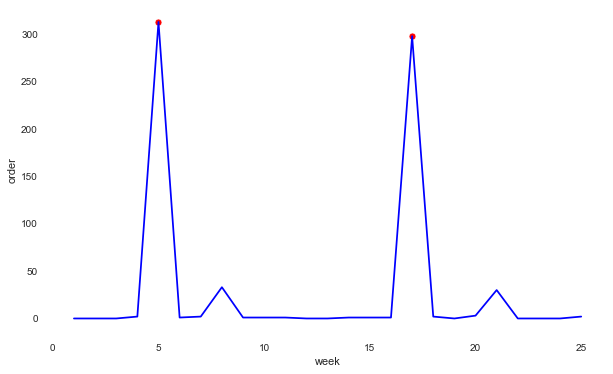

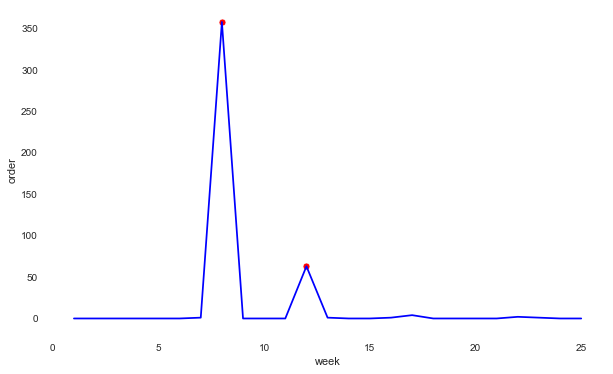

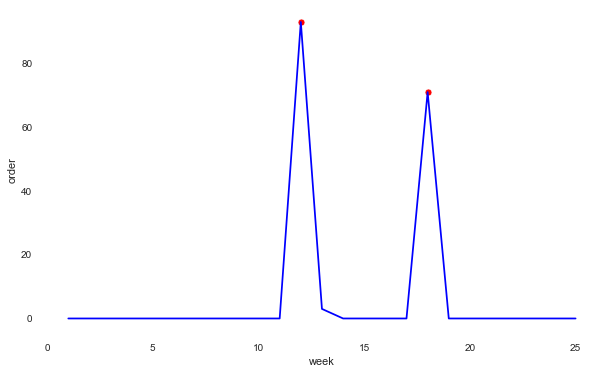

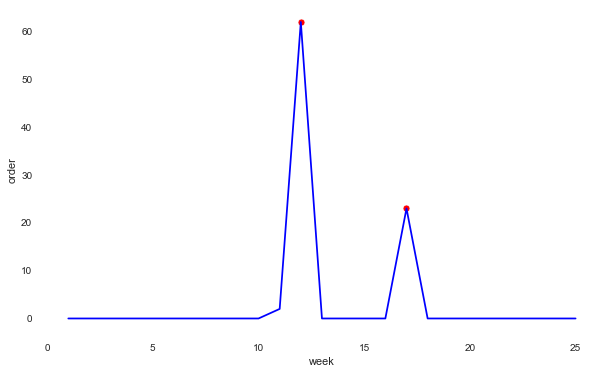

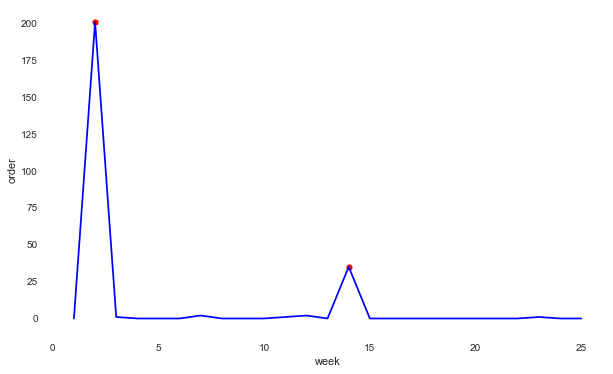

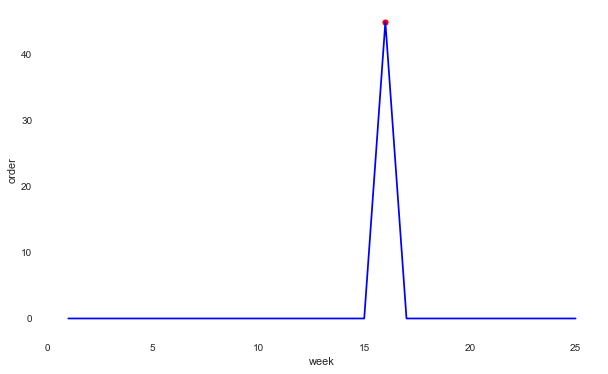

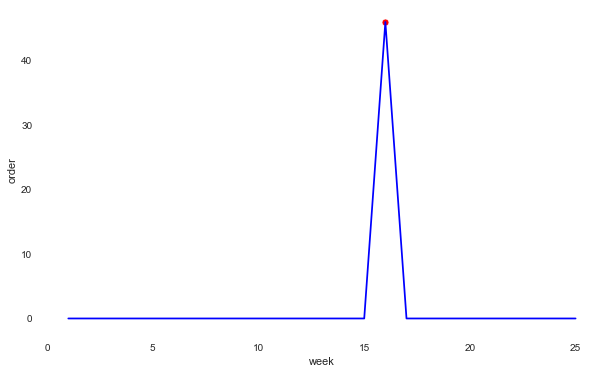

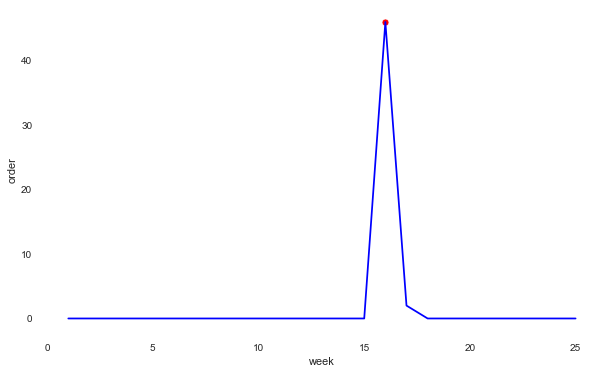

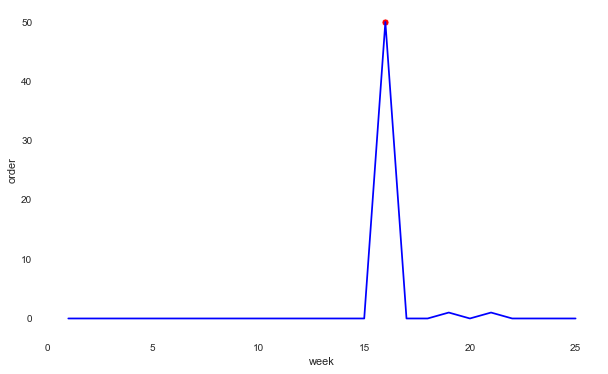

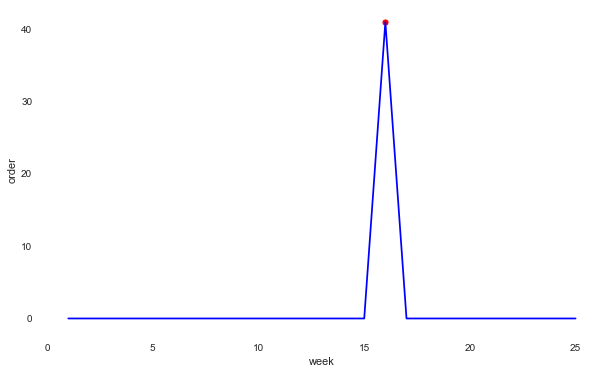

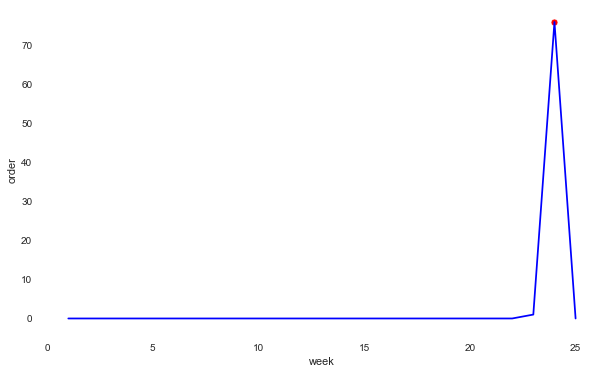

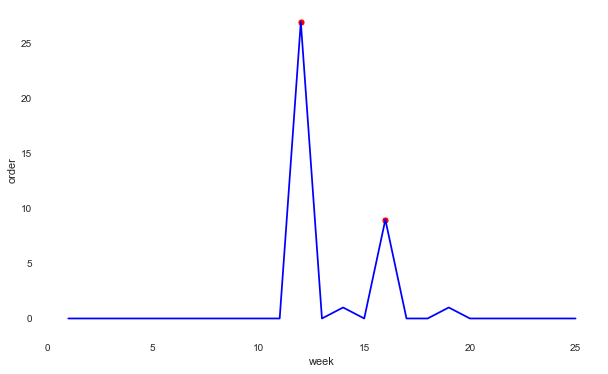

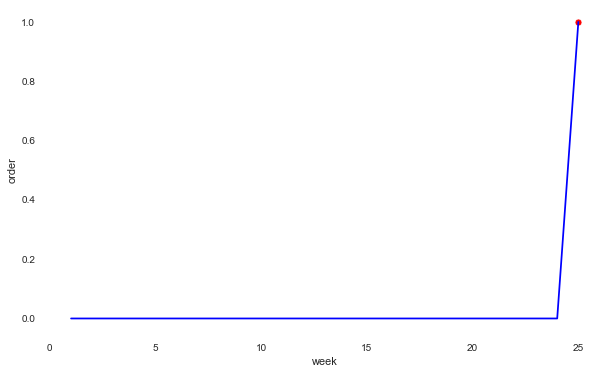

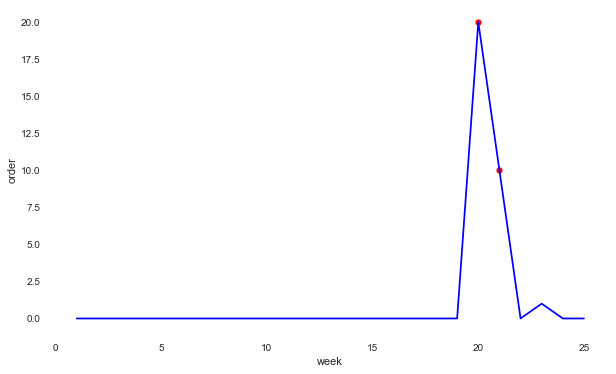

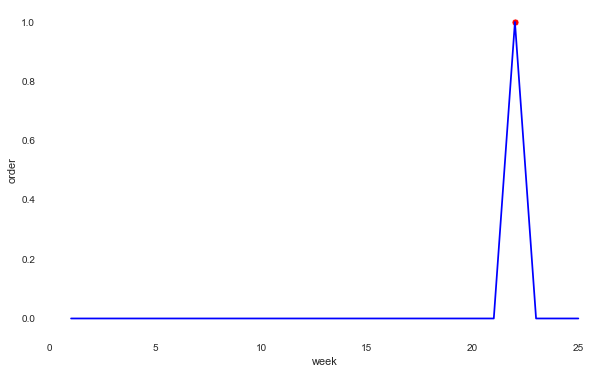

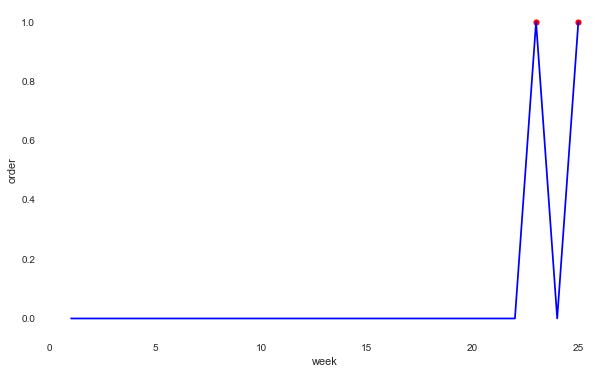

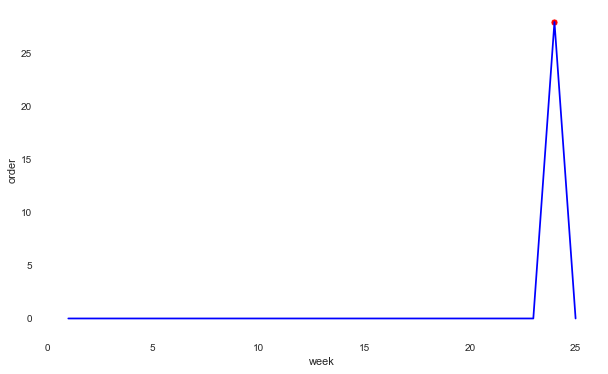

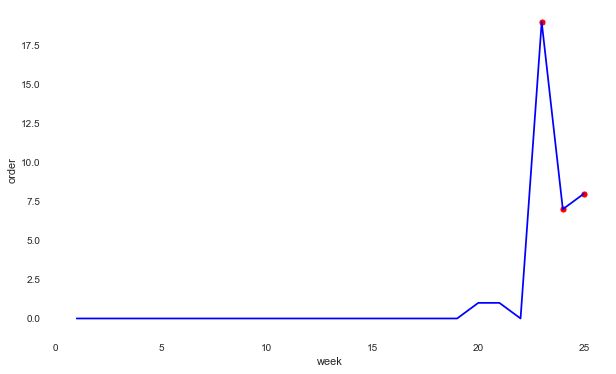

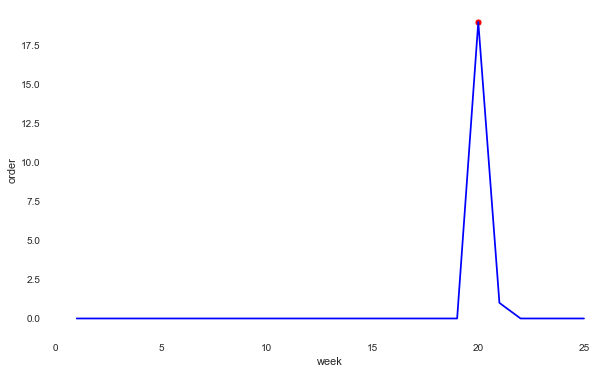

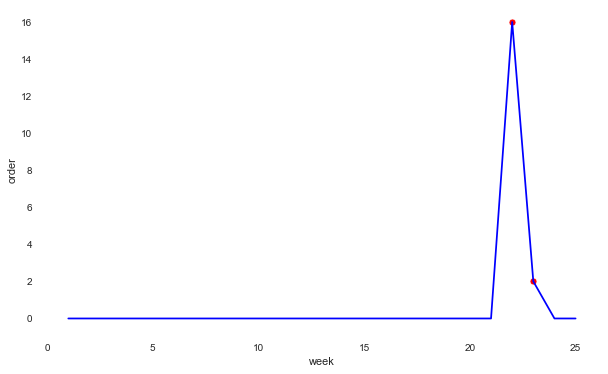

In [180]:
import seaborn as sns
for item in data['itemID'].unique()[0:20]:
    fig, ax = plt.subplots(figsize=(10,6))
    sns.lineplot(x='week', y='order', data=data[data['itemID']==item], color='blue', ax=ax)
    sns.scatterplot(x='week', y='order', data=data[(data['itemID']==item)&(data['pred_promotion']==True)], color='red', ax=ax)
    plt.show()

In [751]:
orders_per_day

,time,itemID,order,totalSalesPrice,salesPrice,pred_promotion
0,2018-01-01,109,2,11.60,5.80,False
1,2018-01-01,11,1,2.13,2.13,False
2,2018-01-01,113,81,277.02,3.42,True
3,2018-01-01,128,1,42.38,42.38,True
4,2018-01-01,137,1,42.26,42.26,False
...,...,...,...,...,...,...
100143,2018-06-29,9889,36,744.84,20.69,True
100144,2018-06-29,9907,1,80.00,80.00,False
100145,2018-06-29,9908,1,631.81,631.81,False
100146,2018-06-29,9922,1,13.37,13.37,False


### daily basis

In [225]:
std = df['order'].std()

In [755]:
orders_per_day

,time,itemID,order,totalSalesPrice,salesPrice,pred_promotion
0,2018-01-01,109,2,11.60,5.80,False
1,2018-01-01,11,1,2.13,2.13,False
2,2018-01-01,113,81,277.02,3.42,True
3,2018-01-01,128,1,42.38,42.38,True
4,2018-01-01,137,1,42.26,42.26,False
...,...,...,...,...,...,...
100143,2018-06-29,9889,36,744.84,20.69,True
100144,2018-06-29,9907,1,80.00,80.00,False
100145,2018-06-29,9908,1,631.81,631.81,False
100146,2018-06-29,9922,1,13.37,13.37,False


In [754]:
from tqdm.notebook import tqdm
for item in tqdm(orders_per_day['itemID'].unique()): 
    df = orders_per_day.loc[orders_per_day['itemID']==item, ['time', 'order']]
    mean = df['order'].sum()/(179)
    std = df['order'].std()
    orders_per_day.loc[(orders_per_day['itemID']==item), 'pred_promotion'] =  [x > (mean+0.2*std) for x in df['order']]

KeyboardInterrupt: 

In [219]:
orders_per_day['pred_promotion'].sum()/(len(orders_per_day['itemID'].unique())*179)

5.677431075986737e-07

In [865]:
orders_per_day[orders_per_day['itemID']=='9908']

,time,itemID,order,totalSalesPrice,salesPrice,pred_promotion
65415,2018-05-18,9908,4,2412.84,603.21,True
71478,2018-05-25,9908,1,606.39,606.39,False
75426,2018-05-30,9908,5,3031.95,606.39,True
76277,2018-05-31,9908,1,606.39,606.39,False
87524,2018-06-14,9908,17,10254.57,603.21,True
97539,2018-06-26,9908,1,612.74,612.74,False
100145,2018-06-29,9908,1,631.81,631.81,False


In [864]:
orders_per_day[orders_per_day['itemID']=='9889']

,time,itemID,order,totalSalesPrice,salesPrice,pred_promotion
83847,2018-06-09,9889,98,2027.62,20.69,True
84644,2018-06-10,9889,7,144.83,20.69,False
85301,2018-06-11,9889,1,20.69,20.69,False
86061,2018-06-12,9889,1,20.69,20.69,False
88918,2018-06-16,9889,1,20.69,20.69,False
89709,2018-06-17,9889,1,20.69,20.69,False
100143,2018-06-29,9889,36,744.84,20.69,True


In [ ]:
import seaborn as sns
for item in orders_per_day['itemID'].unique()[0:20]:
    fig, ax = plt.subplots(figsize=(10,6))
    sns.lineplot(x='week', y='order', data=orders_per_day[orders_per_day['itemID']==item], color='blue', ax=ax)
    sns.scatterplot(x='week', y='order', data=orders_per_day[(orders_per_day['itemID']==item)&(orders_per_day['pred_promotion']==True)], color='red', ax=ax)
    plt.show()

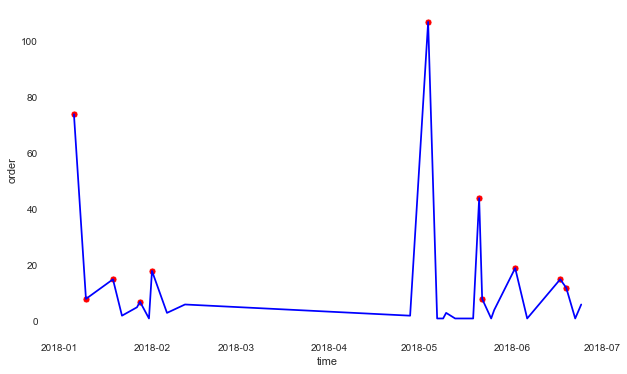

In [220]:
item = '672'
df = orders_per_day.loc[orders_per_day['itemID']==item, ['time', 'order']]
mean = df['order'].sum()/(6*30)
std = df['order'].std()
orders_per_day.loc[(orders_per_day['itemID']==item), 'pred_promotion'] =  [x > (mean+0.2*std) for x in df['order']]

fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(x='time', y='order', data=orders_per_day[orders_per_day['itemID']==item], color='blue', ax=ax)
sns.scatterplot(x='time', y='order', data=orders_per_day[(orders_per_day['itemID']==item)&(orders_per_day['pred_promotion']==True)], color='red', ax=ax)
plt.show()

In [170]:
len(infos['itemID'].unique())

10463

In [201]:
infos[~infos['promotion'].isna()]['promotion'].apply(lambda x: len(x)//10).sum()/(14*9840)

0.014997096399535424

In [200]:
orders_per_day['pred_promotion'].sum()/(100*179)

0.010614525139664804

In [198]:
infos[~infos['promotion'].isna()]['promotion'].apply(lambda x: len(x)//10).sum()

2066

In [199]:
infos[~infos['promotion'].isna()]['promotion']

25                             2018-07-13
26                             2018-07-13
28                             2018-07-13
34       2018-07-01,2018-07-02,2018-07-13
57                             2018-07-13
                       ...               
10446                          2018-07-10
10447                          2018-07-10
10449                          2018-07-10
10454                          2018-07-11
10456                          2018-07-11
Name: promotion, Length: 1843, dtype: object

In [206]:
infos[orders_per_day['itemID'].unique()]['itemID'].unique()  orders_per_day['itemID'].unique()

C:\Users\Luis\Miniconda3\envs\aiss_py37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

In [210]:
infos[(~infos['promotion'].isna())&(~infos['itemID'].isin(orders_per_day['itemID'].unique()))]

,itemID,simulationPrice,promotion
57,58,277.72,2018-07-13
106,107,19.56,2018-07-13
124,125,5.07,"2018-07-08,2018-07-13"
125,126,13.63,"2018-07-05,2018-07-11"
724,725,111.31,2018-07-06
...,...,...,...
10445,10446,104.29,2018-07-10
10446,10447,44.99,2018-07-10
10447,10448,63.00,2018-07-10
10454,10455,62.84,2018-07-11


In [215]:
orders_per_day[orders_per_day['itemID']=='125']

,time,itemID,order,totalSalesPrice,salesPrice,pred_promotion


In [253]:
l = infos[~infos['promotion'].isna()]['promotion'].str.split(',').values 
promotions_test = sum(l, [])

In [257]:
pd.Series(promotions_test).value_counts()

2018-07-04    240
2018-07-02    192
2018-07-06    179
2018-07-05    179
2018-07-10    164
2018-07-08    153
2018-07-03    147
2018-07-07    141
2018-06-30    123
2018-07-01    118
2018-07-09    114
2018-07-13    110
2018-07-11    109
2018-07-12     97
dtype: int64

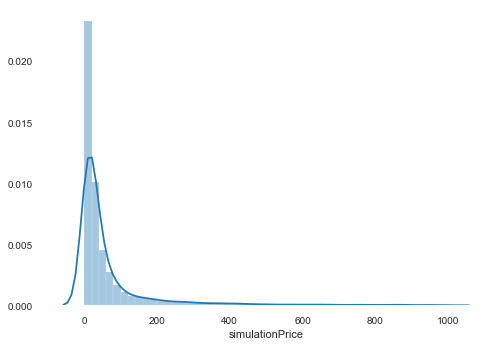

In [261]:
sns.distplot(a=infos[infos['simulationPrice']<1000]['simulationPrice'])

In [726]:
orders_per_day.groupby('itemID').count()['time'].sort_values(ascending=False)[:20]

itemID
7798    180
5122    151
7789    137
5035    122
7792    121
8085    108
4208    104
7938    102
4896    101
5117     99
7761     98
4293     97
4962     96
8292     95
8219     94
5119     93
5128     93
8097     93
5029     91
8040     90
Name: time, dtype: int64

In [602]:
items

,itemID,brand,manufacturer,customerRating,category1,category2,category3,recommendedRetailPrice
0,1,0,1,4.38,1,1,1,8.84
1,2,0,2,3.00,1,2,1,16.92
2,3,0,3,5.00,1,3,1,15.89
3,4,0,2,4.44,1,2,1,40.17
4,5,0,2,2.33,1,1,1,17.04
...,...,...,...,...,...,...,...,...
10458,10459,180,253,0.00,8,44,8,56.57
10459,10460,0,253,0.00,8,44,8,163.81
10460,10461,0,253,0.00,8,44,8,128.01
10461,10462,180,253,0.00,8,44,8,166.97


In [571]:
transactions = pd.merge(left=orders_per_day, right=items, left_on='itemID', right_on='itemID', how='left')

In [572]:
transactions['pred_promotion'] = transactions['pred_promotion'].astype(int)

In [573]:
transactions = pd.merge(transactions, transactions.groupby(['category2', 'time']).sum()['pred_promotion'].reset_index(), left_on=['time', 'category2'], right_on=['time', 'category2'], how='left', suffixes=('', '_y'))

In [574]:
transactions = transactions.rename(columns={'pred_promotion_y': 'cat2_prom'} )

In [866]:
item = '2008'

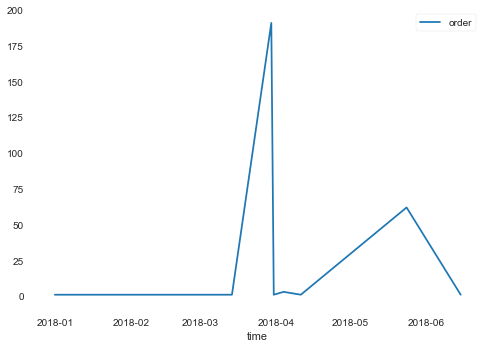

In [867]:
orders_per_day[(orders_per_day['itemID']==item)].plot.line(x='time', y='order')

In [868]:
orders_per_day[(orders_per_day['itemID']==item)]

,time,itemID,order,totalSalesPrice,salesPrice,pred_promotion
16,2018-01-01,2008,1,91.04,91.04,False
4318,2018-01-17,2008,1,91.04,91.04,False
7904,2018-01-29,2008,1,91.04,91.04,False
14387,2018-02-20,2008,1,91.04,91.04,False
23931,2018-03-14,2008,1,91.04,91.04,False
32626,2018-03-30,2008,191,17388.64,91.04,True
33175,2018-03-31,2008,1,88.35,88.35,False
35062,2018-04-04,2008,3,265.05,88.35,False
39824,2018-04-11,2008,1,88.35,88.35,False
69771,2018-05-24,2008,62,5477.70,88.35,True


### Simple prediction (only promotion feature)

In [869]:
# temp = orders_per_day[orders_per_day['itemID']==item].reset_index(drop=True)
# temp['time'] = temp['time'].astype(np.datetime64)
# temp = pd.merge(left = pd.Series(np.arange(np.datetime64('2018-01-01'), np.datetime64('2018-06-30')), name='time'), right = temp, left_on='time', right_on='time', how='left')
# temp['week_day'] = temp['time'].dt.weekday
# temp['time'] = (temp['time'].astype(np.datetime64) - np.datetime64('2018-01-01')).dt.days
# temp['pred_promotion'] = temp['pred_promotion'].fillna(value=False)
# temp['order'] = temp['order'].fillna(value=0).astype(int)
# X = temp[['time', 'pred_promotion', 'week_day']]
# y = temp[['order']]

In [870]:
temp

,time,itemID,order,totalSalesPrice,salesPrice,pred_promotion,brand,manufacturer,customerRating,category1,category2,category3,recommendedRetailPrice,cat2_prom,week_day
0,0,4208,410,7433.30,18.13,1,0,73,3.24,6,18,3,9.52,3.0,0
1,1,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2,4208,3,54.39,18.13,0,0,73,3.24,6,18,3,9.52,2.0,2
3,3,4208,383,6943.79,18.13,1,0,73,3.24,6,18,3,9.52,7.0,3
4,4,4208,7,126.91,18.13,0,0,73,3.24,6,18,3,9.52,3.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,175,4208,1,18.13,18.13,0,0,73,3.24,6,18,3,9.52,1.0,0
176,176,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
177,177,4208,3,54.39,18.13,0,0,73,3.24,6,18,3,9.52,1.0,2
178,178,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


### Complex prediction

In [871]:
temp = transactions[transactions['itemID']==item].reset_index(drop=True)
temp['time'] = temp['time'].astype(np.datetime64)
temp = pd.merge(left = pd.Series(np.arange(np.datetime64('2018-01-01'), np.datetime64('2018-06-30')), name='time'), right = temp, left_on='time', right_on='time', how='left')
temp['week_day'] = temp['time'].dt.weekday
temp['time'] = (temp['time'].astype(np.datetime64) - np.datetime64('2018-01-01')).dt.days
temp['pred_promotion'] = temp['pred_promotion'].fillna(value=0)
temp['pred_promotion'] = temp['pred_promotion'].astype(int)

# temp['cat2_prom'] = cat2_prom[(cat2_prom['category2']==temp['category2'].unique()[-1])].reset_index()['pred_promotion']
temp['order'] = temp['order'].fillna(value=0).astype(int)
X = temp[['time', 'pred_promotion', 'week_day']]
y = temp[['order']]

In [872]:
X_test

,time,pred_promotion,week_day
152,152,0,5
153,153,0,6
154,154,0,0
155,155,0,1
156,156,0,2
157,157,0,3
158,158,0,4
159,159,0,5
160,160,0,6
161,161,0,0


In [873]:
from sklearn.preprocessing import MinMaxScaler
X_scaled = MinMaxScaler().fit_transform(X)
y_scaled = MinMaxScaler().fit_transform(y)

In [874]:
split = 28
X_train, X_test = X[:-split], X[-split:]
y_train, y_test = y[:-split], y[-split:]

# split = 14
# X_train, X_test = X_scaled[:-split], X_scaled[-split:]
# y_train, y_test = y_scaled[:-split], y_scaled[-split:]

In [890]:
# # X_test['pred_promotion'] = 0
# X_test['pred_promotion']=1
# X_test = X_test.iloc[7:8]
# X_test = X_test.values.reshape(1, -1)
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(hidden_layer_sizes=(512, 512, 512), max_iter=1000)
nn.fit(X_train, y_train)
y_pred = nn.predict(X_test)

# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor()
# rf.fit(X_train, y_train)
# y_pred = rf.predict(X_test)

# from sklearn.svm import SVR
# svr = SVR()
# svr.fit(X_train, y_train)
# y_pred = svr.predict(X_test)

C:\Users\Luis\Miniconda3\envs\aiss_py37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [891]:
y_pred = [int(y) for y in y_pred]
print('Test:', y_test.sum()[0], '\nPrediction: ', max(0,np.array(y_pred).sum()))
pd.DataFrame({'test': y_test['order'], 'pred':y_pred})

Test: 1 
Prediction:  0


,test,pred
152,0,-5
153,0,-5
154,0,-9
155,0,-7
156,0,-6
157,0,-4
158,0,-4
159,0,-5
160,0,-6
161,0,-9


In [883]:
orders_per_day[orders_per_day['itemID']==item]

,time,itemID,order,totalSalesPrice,salesPrice,pred_promotion
16,2018-01-01,2008,1,91.04,91.04,False
4318,2018-01-17,2008,1,91.04,91.04,False
7904,2018-01-29,2008,1,91.04,91.04,False
14387,2018-02-20,2008,1,91.04,91.04,False
23931,2018-03-14,2008,1,91.04,91.04,False
32626,2018-03-30,2008,191,17388.64,91.04,True
33175,2018-03-31,2008,1,88.35,88.35,False
35062,2018-04-04,2008,3,265.05,88.35,False
39824,2018-04-11,2008,1,88.35,88.35,False
69771,2018-05-24,2008,62,5477.70,88.35,True
